In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
os.chdir('k:/a/')

In [2]:
global gradientcolor

In [3]:
gradientcolor=['#cfcaca',
 '#cec9c9',
 '#cdc8c8',
 '#ccc7c7',
 '#cbc7c6',
 '#cac6c5',
 '#c9c5c4',
 '#c8c4c3',
 '#c7c3c3',
 '#c6c2c2',
 '#c5c1c1',
 '#c4c0c0',
 '#c3c0bf',
 '#c2bfbe',
 '#c1bebd',
 '#c0bdbc',
 '#c0bcbb',
 '#bfbbba',
 '#bebab9',
 '#bdb9b8',
 '#bcb9b7',
 '#bbb8b6',
 '#bab7b5',
 '#b9b6b4',
 '#b8b5b4',
 '#b7b4b3',
 '#b6b3b2',
 '#b5b2b1',
 '#b4b2b0',
 '#b3b1af',
 '#b2b0ae',
 '#b1afad',
 '#b0aeac',
 '#afadab',
 '#adaca9',
 '#acaaa8',
 '#aba9a7',
 '#aaa8a6',
 '#a9a7a5',
 '#a7a6a3',
 '#a6a5a2',
 '#a5a4a1',
 '#a4a3a0',
 '#a3a19f',
 '#a1a09d',
 '#a09f9c',
 '#9f9e9b',
 '#9e9d9a',
 '#9d9c99',
 '#9c9b98',
 '#9a9a96',
 '#999895',
 '#989794',
 '#979693',
 '#969592',
 '#949490',
 '#93938f',
 '#92928e',
 '#91918d',
 '#908f8c',
 '#8e8e8a',
 '#8d8d89',
 '#8c8c88',
 '#8a8a86',
 '#888884',
 '#858582',
 '#838380',
 '#81817d',
 '#7f7f7b',
 '#7c7c79',
 '#7a7a77',
 '#787875',
 '#767673',
 '#737471',
 '#71716f',
 '#6f6f6c',
 '#6d6d6a',
 '#6a6b68',
 '#686966',
 '#666664',
 '#646462',
 '#616260',
 '#5f605e',
 '#5d5d5b',
 '#5b5b59',
 '#585957',
 '#565755',
 '#545553',
 '#525251',
 '#4f504f',
 '#4d4e4d',
 '#4b4c4a',
 '#494948',
 '#464746',
 '#444544',
 '#434443',
 '#414241',
 '#404140',
 '#3f403f',
 '#3e3f3e',
 '#3c3d3c',
 '#3b3c3b',
 '#3a3b3a',
 '#393939',
 '#373837',
 '#363736',
 '#353635',
 '#343434',
 '#323332',
 '#313231',
 '#303030',
 '#2f2f2f',
 '#2d2e2d',
 '#2c2c2c',
 '#2b2b2b',
 '#2a2a2a',
 '#282928',
 '#272727',
 '#262626',
 '#252525',
 '#232323',
 '#222222',
 '#212121',
 '#202020',
 '#1e1e1e',
 '#1d1d1d',
 '#1c1c1c',
 '#1c1c1c',
]

In [4]:
target=['Hong Kong','Singapore',
        'Canada','United States',
        'Viet Nam','Malaysia','France']

In [5]:
#single plot for in sample data
def plot_in_sample(data,actualcol,fittedcol,title,
                   fig,order,color1,color2,color3):    
    
    ax=fig.add_subplot(order)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(data['country'].iloc[0]+'\n'+title)
    plt.ylabel('number')
    plt.xlabel('date')
    
    data[actualcol][data['graph type']=='poisson'].plot(label='Actual',
                                                        alpha=0.9,c=color1)
    data[fittedcol][data['graph type']=='poisson'].plot(label='ER Fitted',
                                                        alpha=0.9,c=color2)
    data[fittedcol][data['graph type']=='powerlaw'].plot(label='BA Fitted',
                                                         alpha=0.9,c=color3)
    
    plt.legend(loc=0)

In [6]:
#single plot for out of sample data
def plot_outta_sample(data,actualcol,fittedcol,
                      title,fig,order,color):    
    
    fitted_all=[i for i in data.columns if fittedcol in i and not data[i].isnull().all()]
    
    #using gradient color to plot
    colorlist=gradientcolor[0::int(len(gradientcolor)/len(fitted_all))]
    
    ax=fig.add_subplot(order)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.title(data['country'].iloc[0]+'\n'+title)
    plt.ylabel('number')
    plt.xlabel('date')
    
    data[actualcol][data['graph type']=='poisson'].plot(
        label='Actual',alpha=0.9,c=color)
    
    #plot different percentage training data
    for i in range(len(fitted_all)):
        pct=float(fitted_all[i].split(' ')[0])
        if not data[fitted_all[i]][data['graph type']=='poisson'].isnull().all():
            data[fitted_all[i]][data['graph type']=='poisson'].plot(
                label=f'{round(pct*100,0)}% ER',
                alpha=0.75,c=colorlist[i])
        if not data[fitted_all[i]][data['graph type']=='powerlaw'].isnull().all():
            data[fitted_all[i]][data['graph type']=='powerlaw'].plot(
                label=f'{round(pct*100,0)}% BA',
                alpha=0.75,c=colorlist[i],linestyle='--')
    
    plt.legend(loc=0)  

In [7]:
#plot S,I,R,D in a 2 by 2 figure for in sample data
def plot_all(data,method='in-sample',savefig=False):

    fig=plt.figure(figsize=(12,8))

    if method=='in-sample':
        iteration=[('susceptible','susceptible fitted',
                        'Susceptible Population',221,
                        '#1f6521','#d6ce15','#87c735'),
                       ('currently infected','infected fitted',
                        'Currently Infected',222,
                        '#f13c20','#f79e02','#FCADE1'),
                       ('Number recovered','recovered fitted',
                        'Recovered Patients',223,
                        '#4c495d','#E6CCF0','#A65ABC'),
                       ('Number of deaths','death fitted',
                        'Virus-caused Death',224,
                        '#4d6d9a','#99ced3','#18BEA9')]
        for i in iteration:           
            actualcol,fittedcol,title,order,color1,color2,color3=i            
            plot_in_sample(data,actualcol,fittedcol,title,
                           fig,order,color1,color2,color3)
            
    if method=='outta-sample':
        iteration=[('susceptible','susceptible fitted',
                        'Susceptible Population',221,'#00743f'),
                        ('currently infected','infected fitted',
                         'Currently Infected',222,'#f13c20'),
                        ('Number recovered','recovered fitted',
                         'Recovered Patients',223,'#841983'),
                        ('Number of deaths','death fitted',
                         'Virus-caused Death',224,'#05acd3')]
        for i in iteration:            
            actualcol,fittedcol,title,order,color=i            
            plot_outta_sample(data,actualcol,fittedcol,title,
                           fig,order,color)
    
    #avoid messed up title and xlabel 
    plt.tight_layout(pad=1.5)
    
    if savefig:
        figname=f"graph-SARS-{data['country'].iloc[0]}-{method}.png"
        plt.savefig(figname.lower())
    
    plt.show()

&nbsp;
### In-sample Data
&nbsp;

In [8]:
df=pd.read_csv('grand-graph-sars-in-sample.csv')
df.set_index('report date',inplace=True)
df.index=pd.to_datetime(df.index)

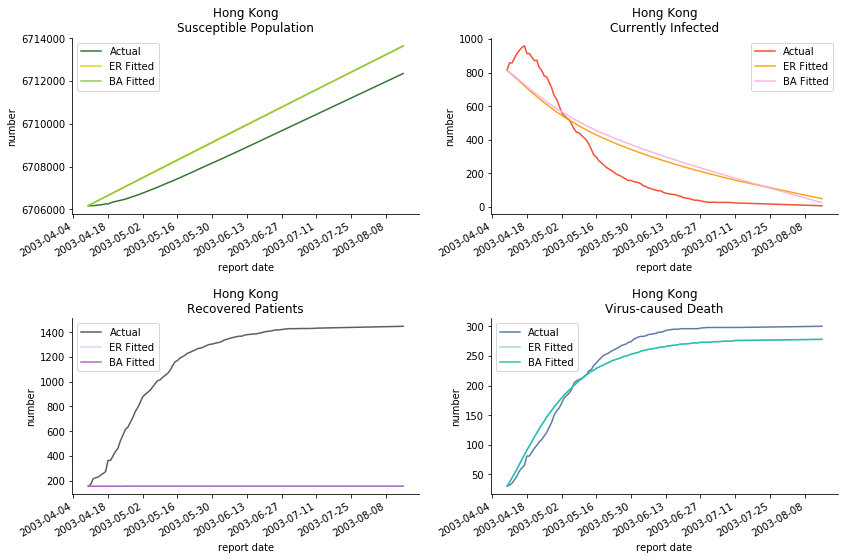

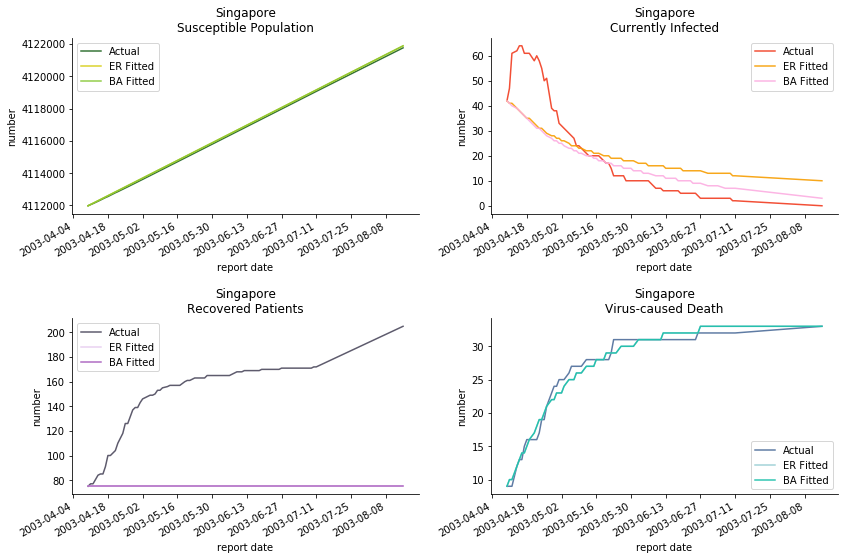

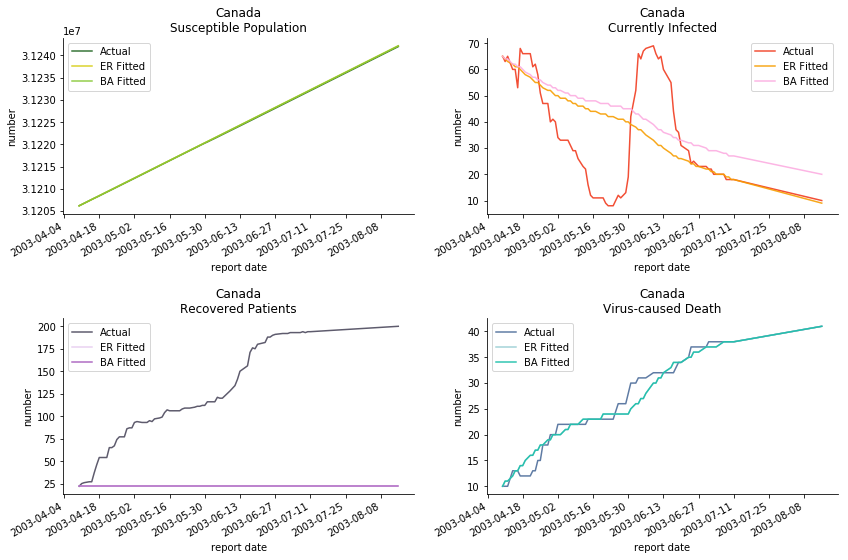

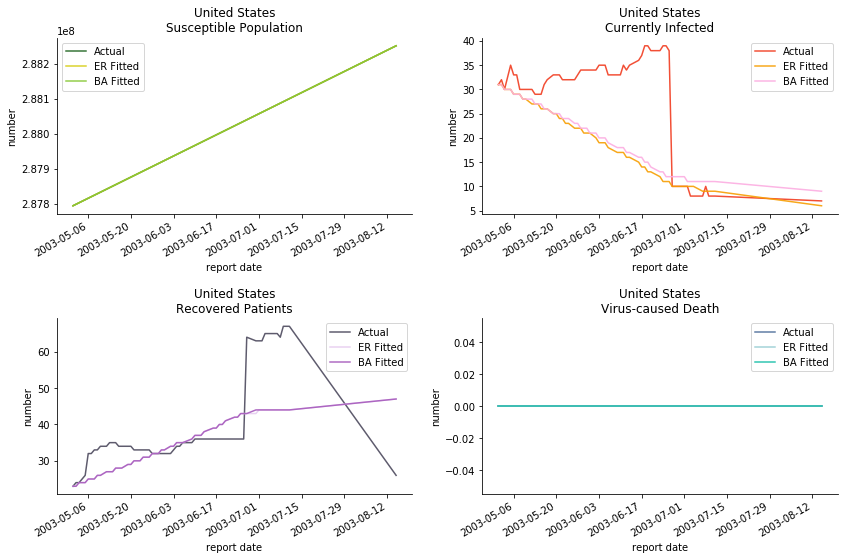

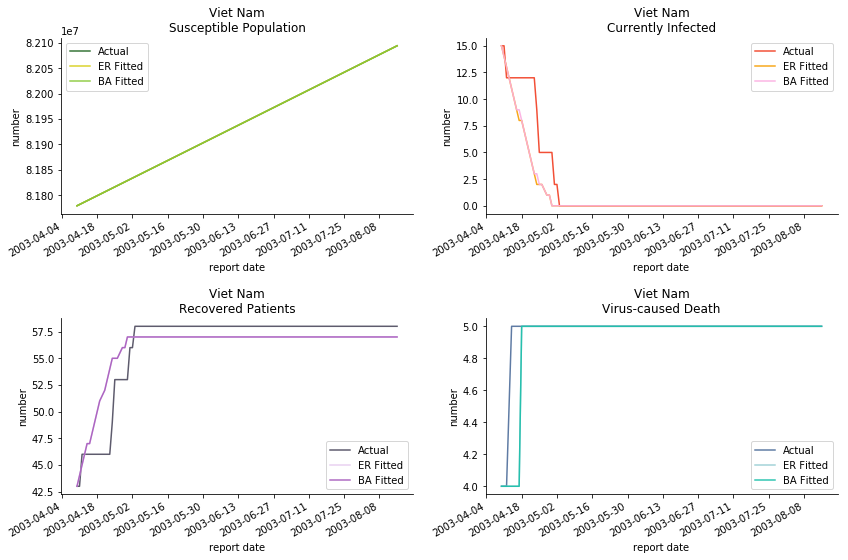

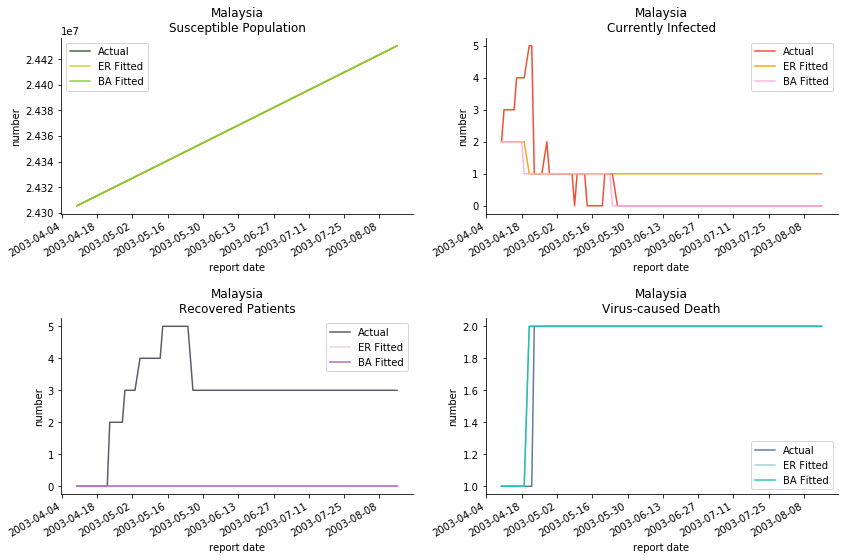

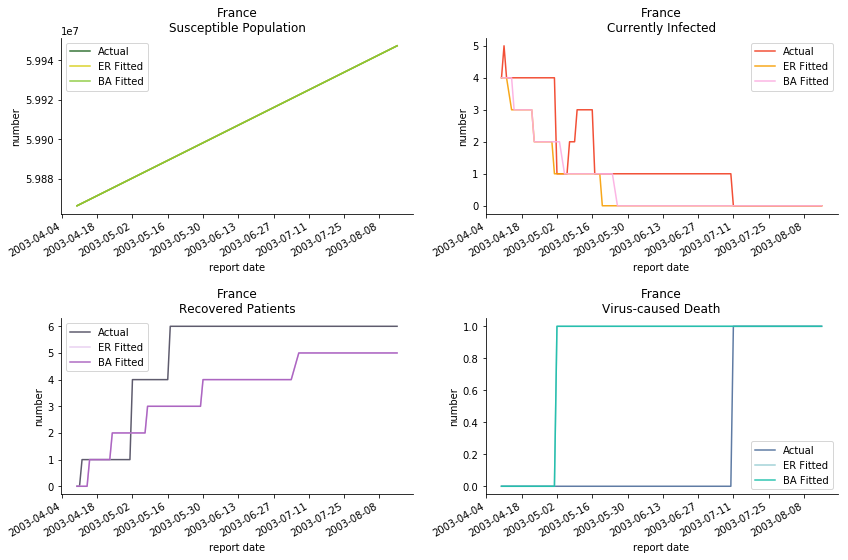

In [9]:
for i in target:    
    data=df[df['country']==i]
    plot_all(data,savefig=True)

&nbsp;
### Out-of-sample Data
&nbsp;

In [10]:
df=pd.read_csv('grand-graph-sars-outta-sample.csv')
df.set_index('report date',inplace=True)
df.index=pd.to_datetime(df.index)

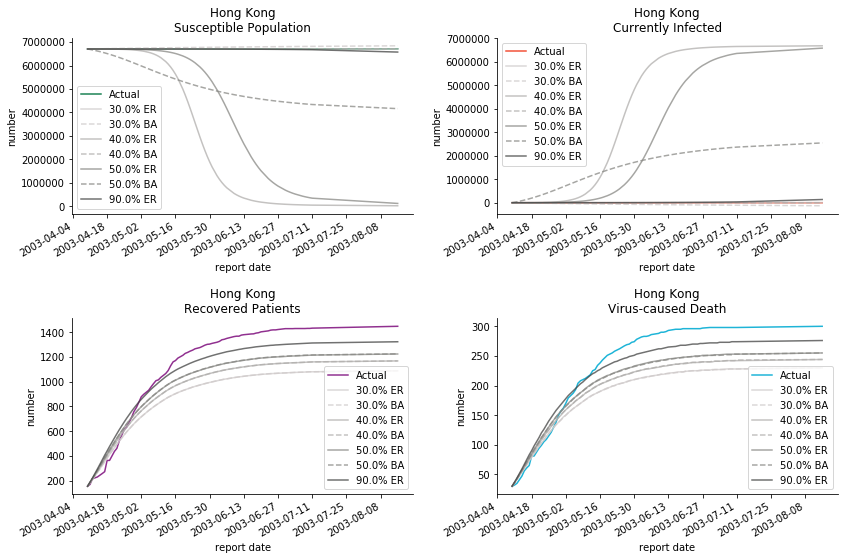

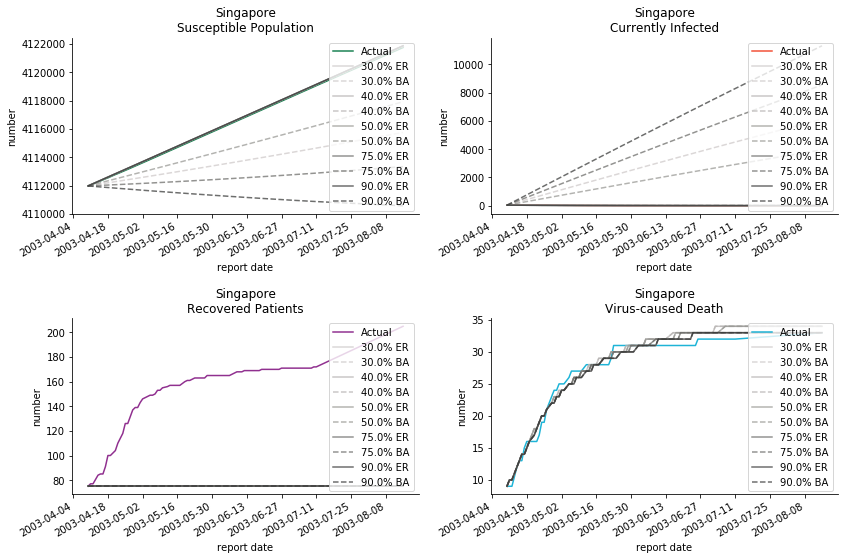

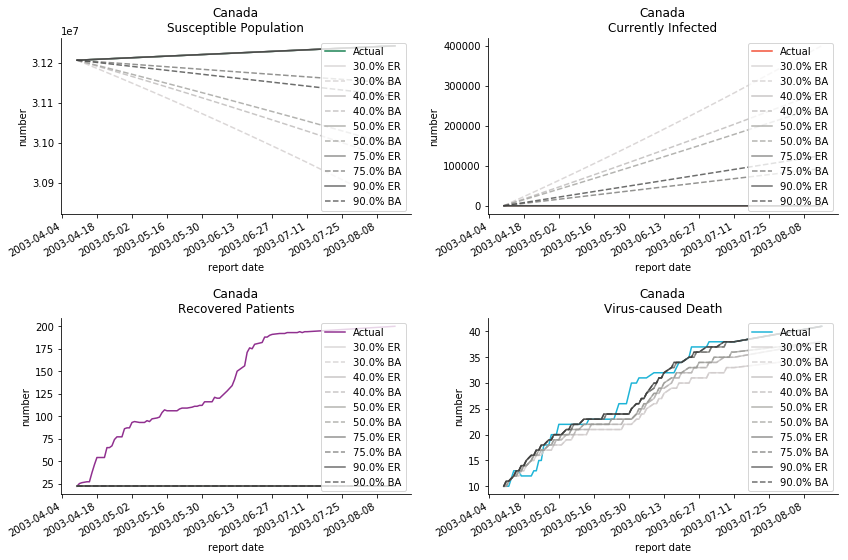

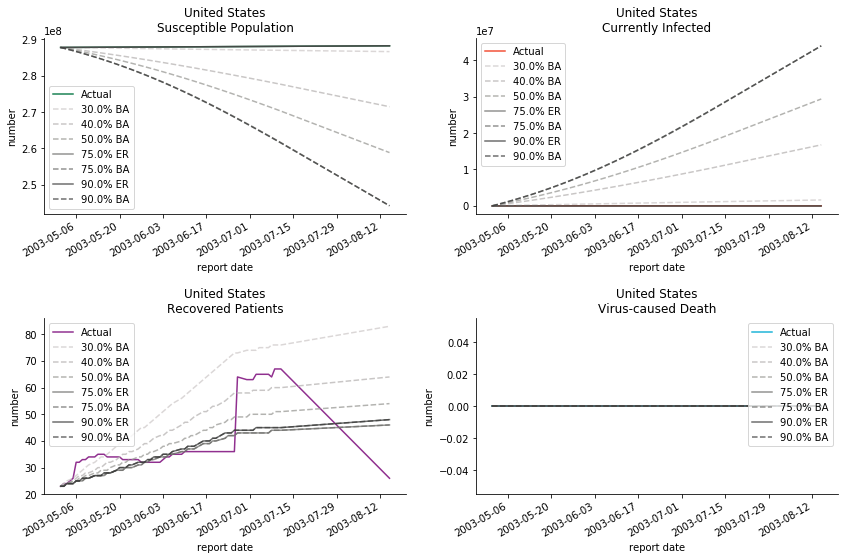

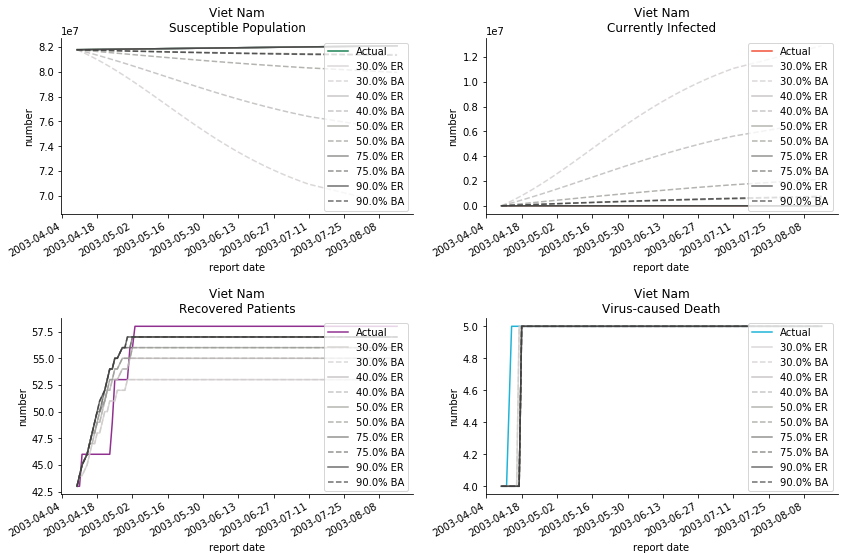

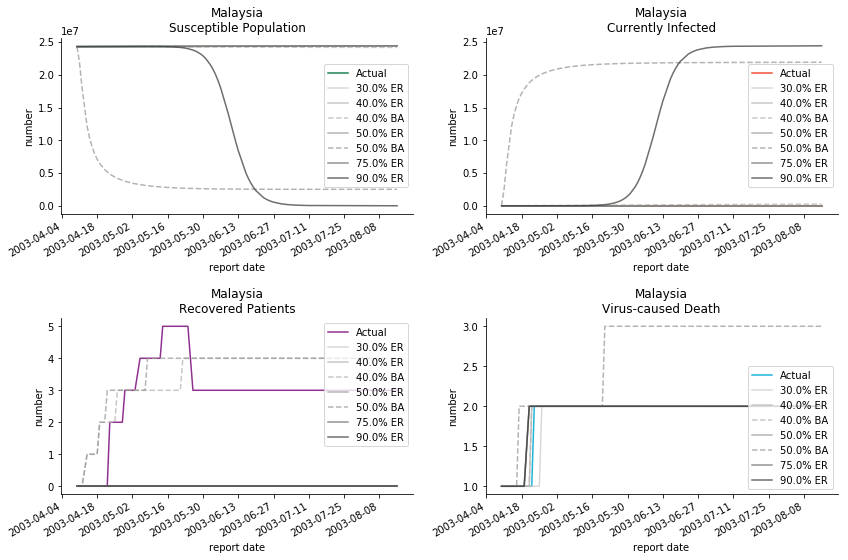

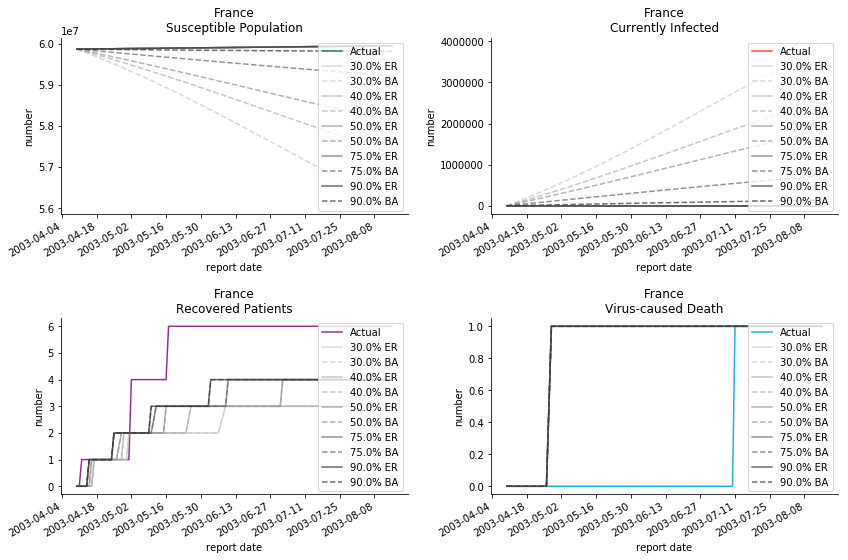

In [11]:
for i in target:    
    data=df[df['country']==i]
    plot_all(data,method='outta-sample',savefig=True)